<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice PCA using a dataset from Kaggle! PCA is often used to simplify data, reduce noise, and find unmeasured "latent variables". So, it is important to spend the time to understand what's going on.

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether a speed dater likes reading, based on the dater's other likes.

---

### Dataset

The dataset we are using for this lab is a subset of the [much more detailed speed dating dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (successes with or opinions of other individuals). It also contains no "follow-up" information where individuals are re-asked the same questions about themselves. All it contains are things that an individual enjoys doing, their ratings of themselves on how desireable they are, and how they think others rate them on desireability.

Specifically, the columns in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   unique individual identifier
    wave                         |   meetup id
    like_sports                  |   enjoyment of participating in sports
    like_tvsports                |   enjoyment of watching sports on tv
    like_exercise                |   enjoyment of exercise
    like_food                    |   enjoyment of food
    like_museums                 |   enjoyment of museums
    like_art                     |   enjoyment of art
    like_hiking                  |   enjoyment of hiking
    like_gaming                  |   enjoyment of playing games
    like_clubbing                |   enjoyment of going clubbing/partying
    like_reading                 |   enjoyment of reading
    like_tv                      |   enjoyment of tv in general
    like_theater                 |   enjoyment of the theater (plays, musicals, etc.)
    like_movies                  |   enjoyment of movies
    like_concerts                |   enjoyment of concerts
    like_music                   |   enjoyment of music
    like_shopping                |   enjoyment of shopping
    like_yoga                    |   enjoyment of yoga
    subjective_attractiveness    |   how attractive they rate themselves
    subjective_sincerity         |   how sincere they rate themselves
    subjective_intelligence      |   how intelligent they rate themselves
    subjective_fun               |   how fun they rate themselves
    subjective_ambition          |   how ambitious they rate themselves
    objective_attractiveness     |   percieved rating others would give them on how attractive they are
    objective_sincerity          |   perceived rating others would give them on how sincere they are
    objective_intelligence       |   perceived rating others would give them on how intelligent they are
    objective_fun                |   perceived rating others would give them on how fun they are
    objective_ambition           |   perceived rating others would give them on how ambitious they are
    
There are 551 subjects total.

---

### 1. Load packages

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [124]:
from sklearn.decomposition import PCA

---

### 2. Load and clean speed dating data

- Remove columns with over 200 missing values.
- Then, remove rows with missing values.
- Verify no rows contain NaNs.

In [125]:
sd = pd.read_csv('./datasets/speed_dating.csv')

**Remove columns with more than 200 missing Values**

In [126]:
'''Remove columns with over 200 missing values'''
cols_to_drop = list(sd.columns[sd.isnull().sum()>200])
sd.drop(cols_to_drop, axis=1, inplace=True)

In [127]:
'''Validating to check if there are any null columns with greater than 200 missing values'''
sd.columns[sd.isnull().sum()>200]

Index([], dtype='object')

**Remove Missing Values**

In [128]:
sd.isnull().sum()>0

subject_id                   False
wave                         False
like_sports                   True
like_tvsports                 True
like_exercise                 True
like_food                     True
like_museums                  True
like_art                      True
like_hiking                   True
like_gaming                   True
like_clubbing                 True
like_reading                  True
like_tv                       True
like_theater                  True
like_movies                   True
like_concerts                 True
like_music                    True
like_shopping                 True
like_yoga                     True
subjective_attractiveness     True
subjective_sincerity          True
subjective_intelligence       True
subjective_fun                True
subjective_ambition           True
dtype: bool

In [129]:
sd.dropna(axis=0, inplace=True)

**Verify no rows contain NaNs.**

In [130]:
sd.isnull().sum()>0

subject_id                   False
wave                         False
like_sports                  False
like_tvsports                False
like_exercise                False
like_food                    False
like_museums                 False
like_art                     False
like_hiking                  False
like_gaming                  False
like_clubbing                False
like_reading                 False
like_tv                      False
like_theater                 False
like_movies                  False
like_concerts                False
like_music                   False
like_shopping                False
like_yoga                    False
subjective_attractiveness    False
subjective_sincerity         False
subjective_intelligence      False
subjective_fun               False
subjective_ambition          False
dtype: bool

---

### 3. EXAMPLE: Are the `subjective` columns correlated?

Here, we will understand how the `subjective` columns are correlated.

- Standardize the `subjective` columns.
- Visualize correlation using PairGrid.
- Visualize correlation using a heatmap.

#### 3.A. Standardize each column. This better allows the columns to be directly compared.

In [131]:
subjective_cols = [col for col in sd.columns if col.startswith('subjective')]
subjective_cols

['subjective_attractiveness',
 'subjective_sincerity',
 'subjective_intelligence',
 'subjective_fun',
 'subjective_ambition']

In [132]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [133]:
subjective_sd = sd[subjective_cols]
subjective_sd.head()

subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                        6.0                   8.0                      8.0   
1                        7.0                   5.0                      8.0   
2                        8.0                   9.0                      9.0   
3                        7.0                   8.0                      7.0   
4                        6.0                   3.0                     10.0   

   subjective_fun  subjective_ambition  
0             8.0                  7.0  
1            10.0                  3.0  
2             8.0                  8.0  
3             9.0                  8.0  
4             6.0                  8.0

In [134]:
subjective_sd_transform = ss.fit_transform(subjective_sd)
subjective_sd_transform[0:5]

array([[-0.78647228, -0.20271555, -0.35419405,  0.19332293, -0.32358876],
       [-0.06642502, -2.32926706, -0.35419405,  1.48691586, -2.564932  ],
       [ 0.65362224,  0.50613495,  0.56433788,  0.19332293,  0.23674705],
       [-0.06642502, -0.20271555, -1.27272598,  0.84011939,  0.23674705],
       [-0.78647228, -3.74696807,  1.48286981, -1.10027   ,  0.23674705]])

In [135]:
subjective_sd_df = pd.DataFrame(subjective_sd_transform, columns=subjective_sd.columns)
subjective_sd_df.head()

subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                  -0.786472             -0.202716                -0.354194   
1                  -0.066425             -2.329267                -0.354194   
2                   0.653622              0.506135                 0.564338   
3                  -0.066425             -0.202716                -1.272726   
4                  -0.786472             -3.746968                 1.482870   

   subjective_fun  subjective_ambition  
0        0.193323            -0.323589  
1        1.486916            -2.564932  
2        0.193323             0.236747  
3        0.840119             0.236747  
4       -1.100270             0.236747

**Visualize correlation using PairGrid.**

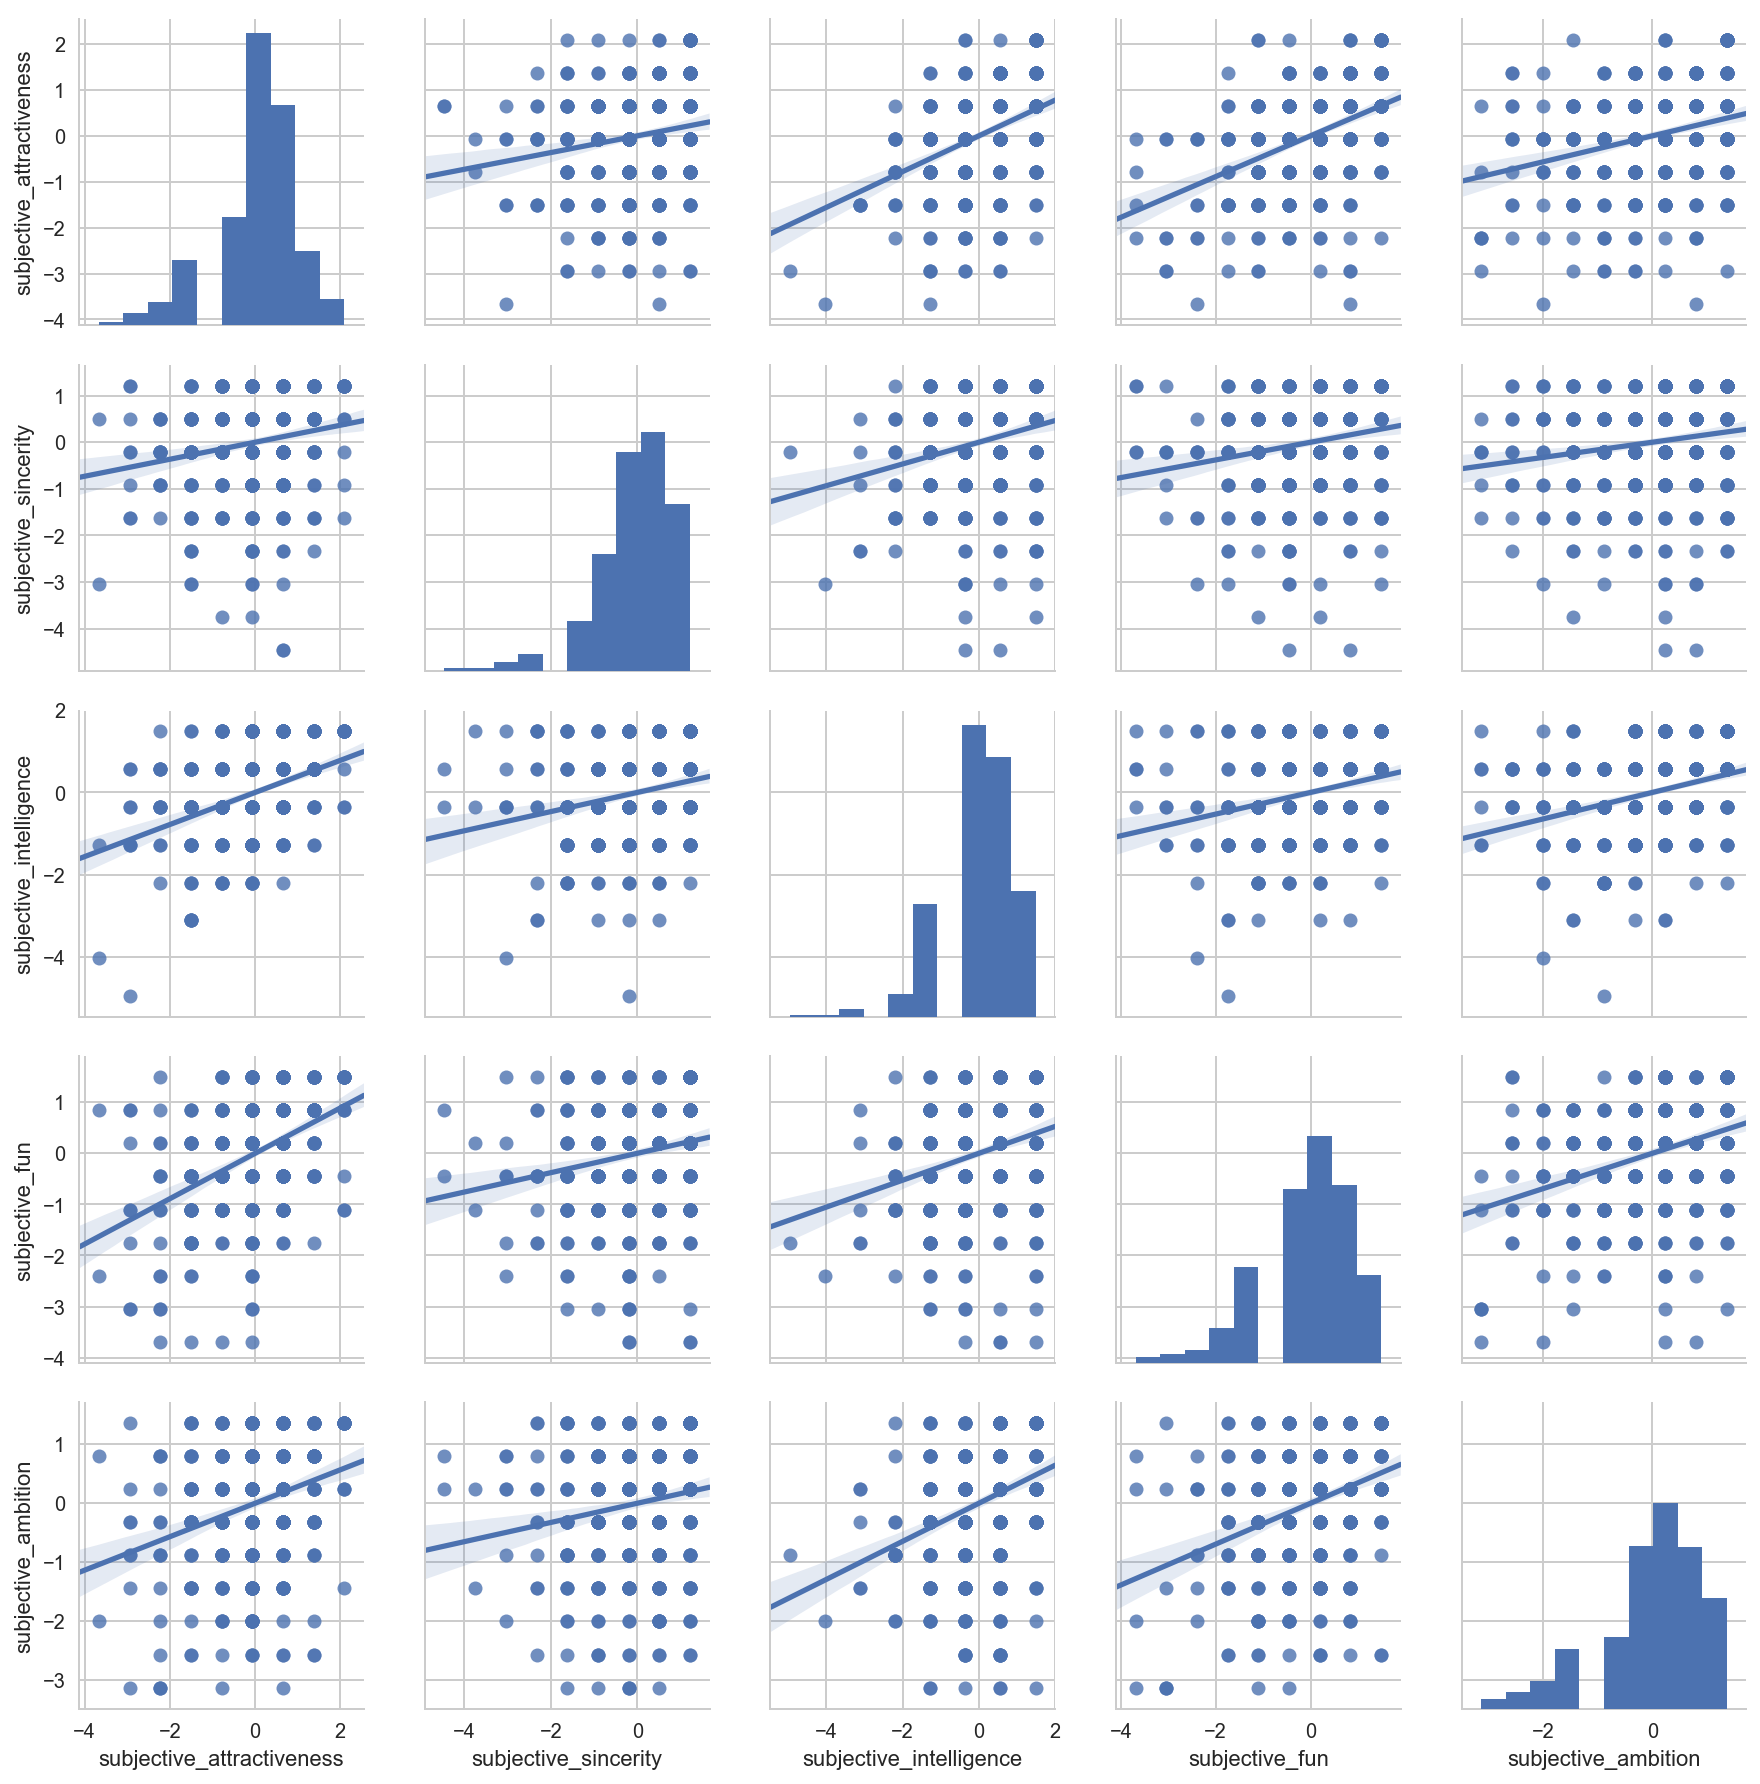

In [136]:
sns.pairplot(subjective_sd_df, kind='reg')

**Visualize correlation using a heatmap**

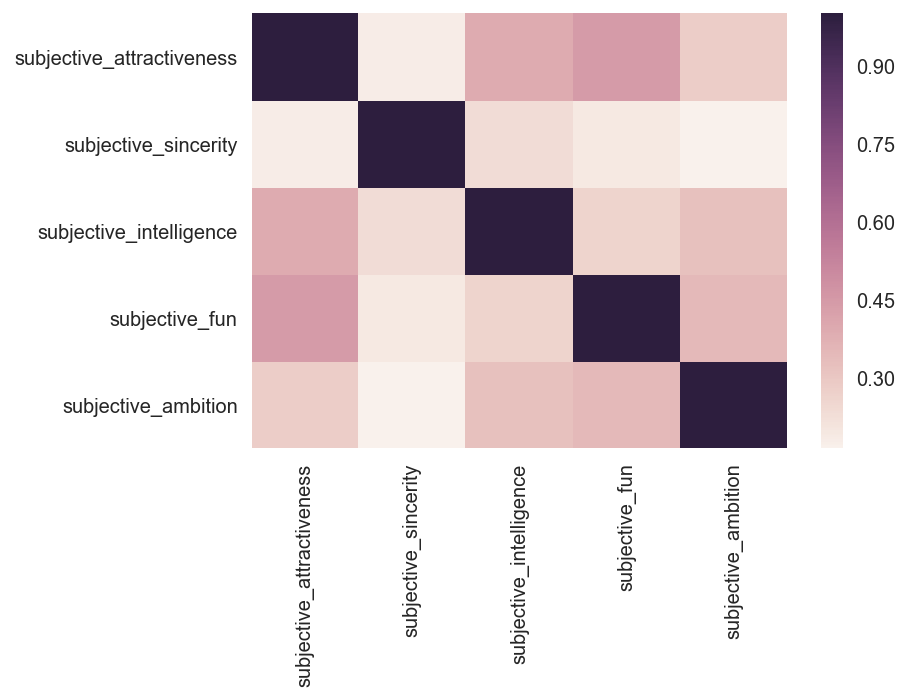

In [137]:
sns.heatmap(subjective_sd_df.corr())

#### 3.B. Use a PairGrid to visualize correlation

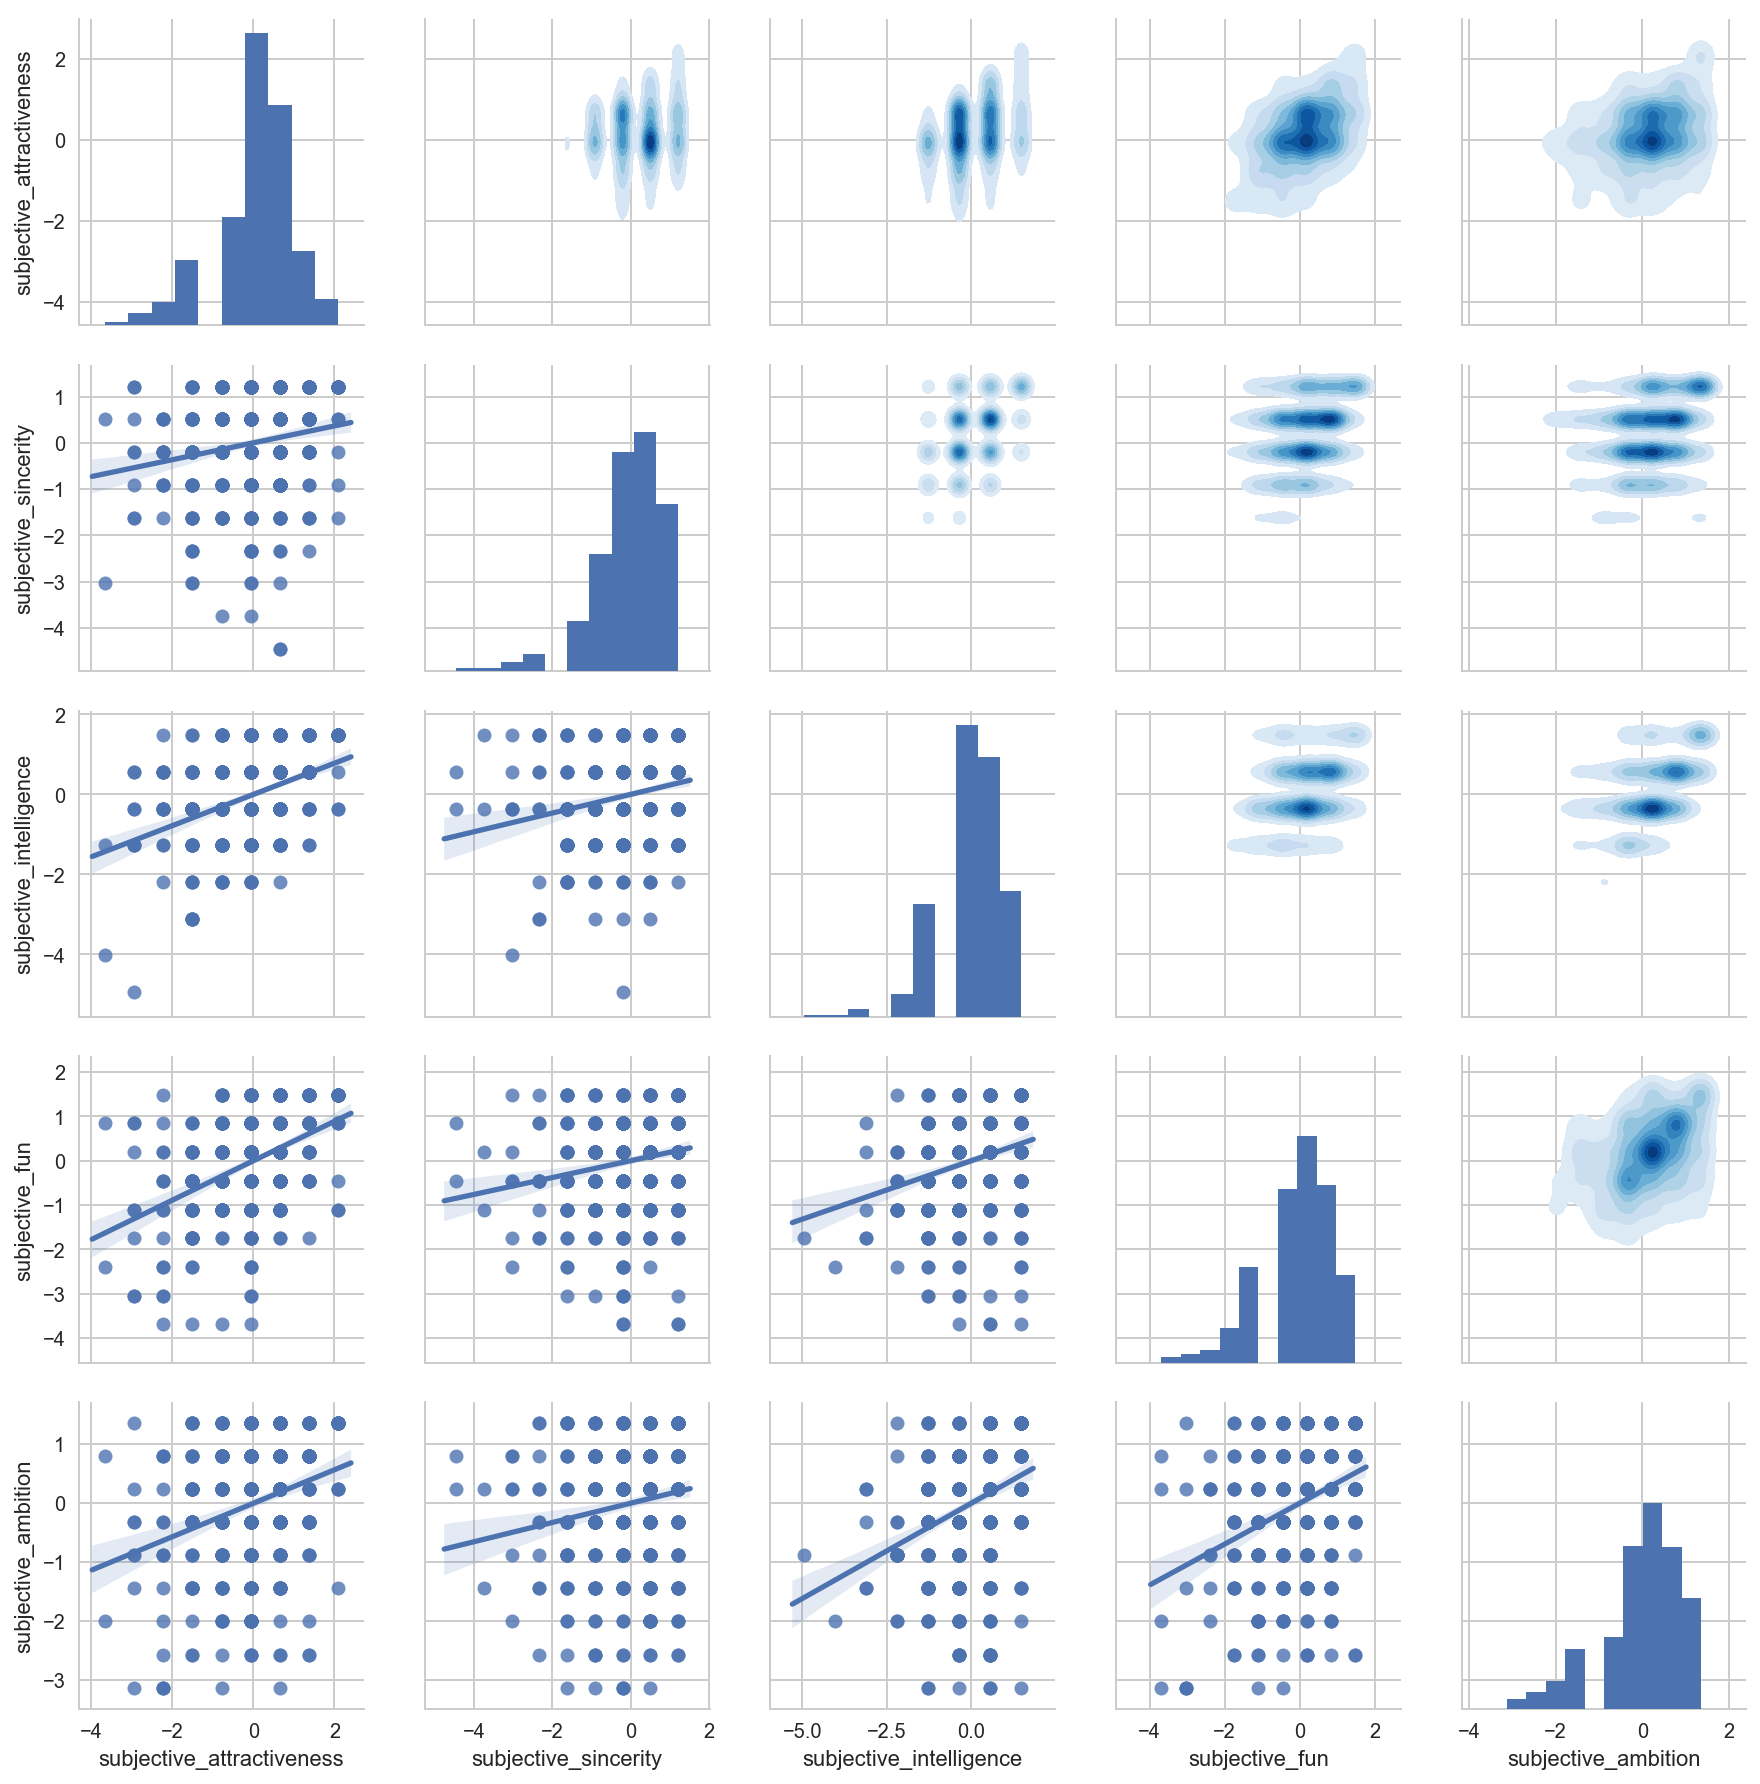

In [138]:
# subjective here is the data frame containing the subjective columns from above
g = sns.PairGrid(subjective_sd_df)
g = g.map_lower(sns.regplot)    # regression plots in lower tri
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper tri
g = g.map_diag(plt.hist)        # histograms along diagonal

plt.show()

#### 3.C. Use a heatmap to visualize correlation

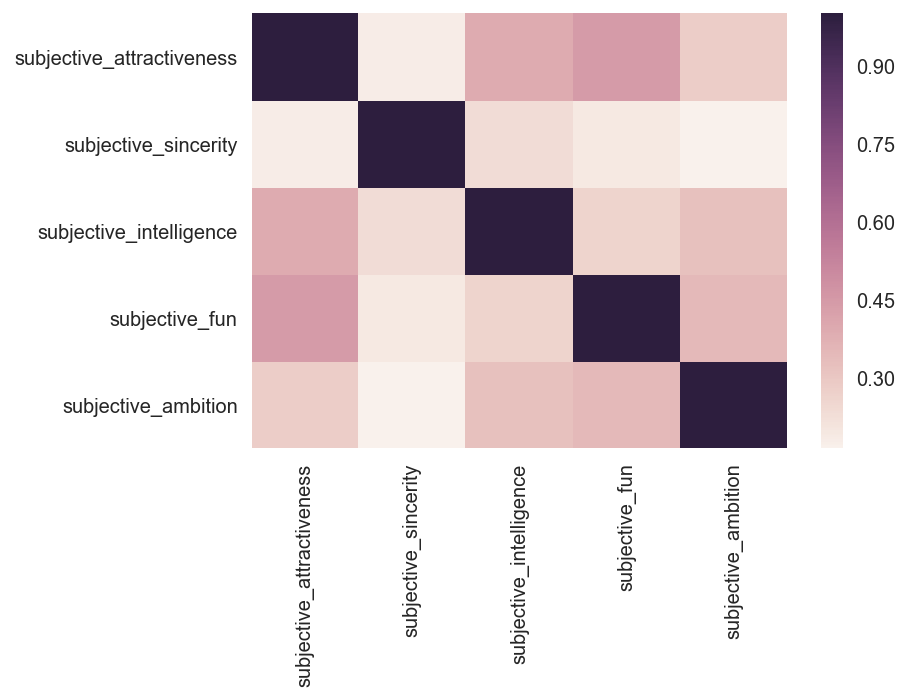

In [139]:
sns.heatmap(subjective_sd_df.corr())

---

**Important: Did you ensure the results make intuitive sense?** If not, look at the results again. You should **always** interpret your results and ensure they "make sense" intutitively. If they are different than you expect, investigate why -- often your analysis or data is wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4. Visualize some preference columns

Next, we will understand how some preference ratings are correlated. 

- Standardize each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heatmap.
- Do these results make sense intuitively? 

In [140]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 'like_theater', 'like_shopping']
sd_like = sd[preference_cols]

#### 4.A. Standardize each column in preference_cols

In [153]:
sd_like = sd[preference_cols]
sd_like_ss = ss.fit_transform(sd_like)

sd_like_ss[0:5]

array([[-0.91277993,  0.99253939, -2.9350508 , -2.56086869,  0.9132538 ],
       [-0.91277993, -1.29177631,  0.49761959,  0.98557866, -1.00083575],
       [ 1.23044052, -1.29177631, -0.97352486,  0.09896682,  0.9132538 ],
       [-1.26998334, -2.05321488, -0.48314338,  0.98557866, -1.76647157],
       [-0.19837311,  0.23110082, -0.48314338, -0.3443391 ,  0.9132538 ]])

In [156]:
sd_like_pcadf = pd.DataFrame(sd_like_ss, columns=sd_preference.columns)
sd_like_pcadf.head()

like_tvsports  like_sports  like_museums  like_theater  like_shopping
0      -0.912780     0.992539     -2.935051     -2.560869       0.913254
1      -0.912780    -1.291776      0.497620      0.985579      -1.000836
2       1.230441    -1.291776     -0.973525      0.098967       0.913254
3      -1.269983    -2.053215     -0.483143      0.985579      -1.766472
4      -0.198373     0.231101     -0.483143     -0.344339       0.913254

#### 4.B. Visualize correlation using PairGrid

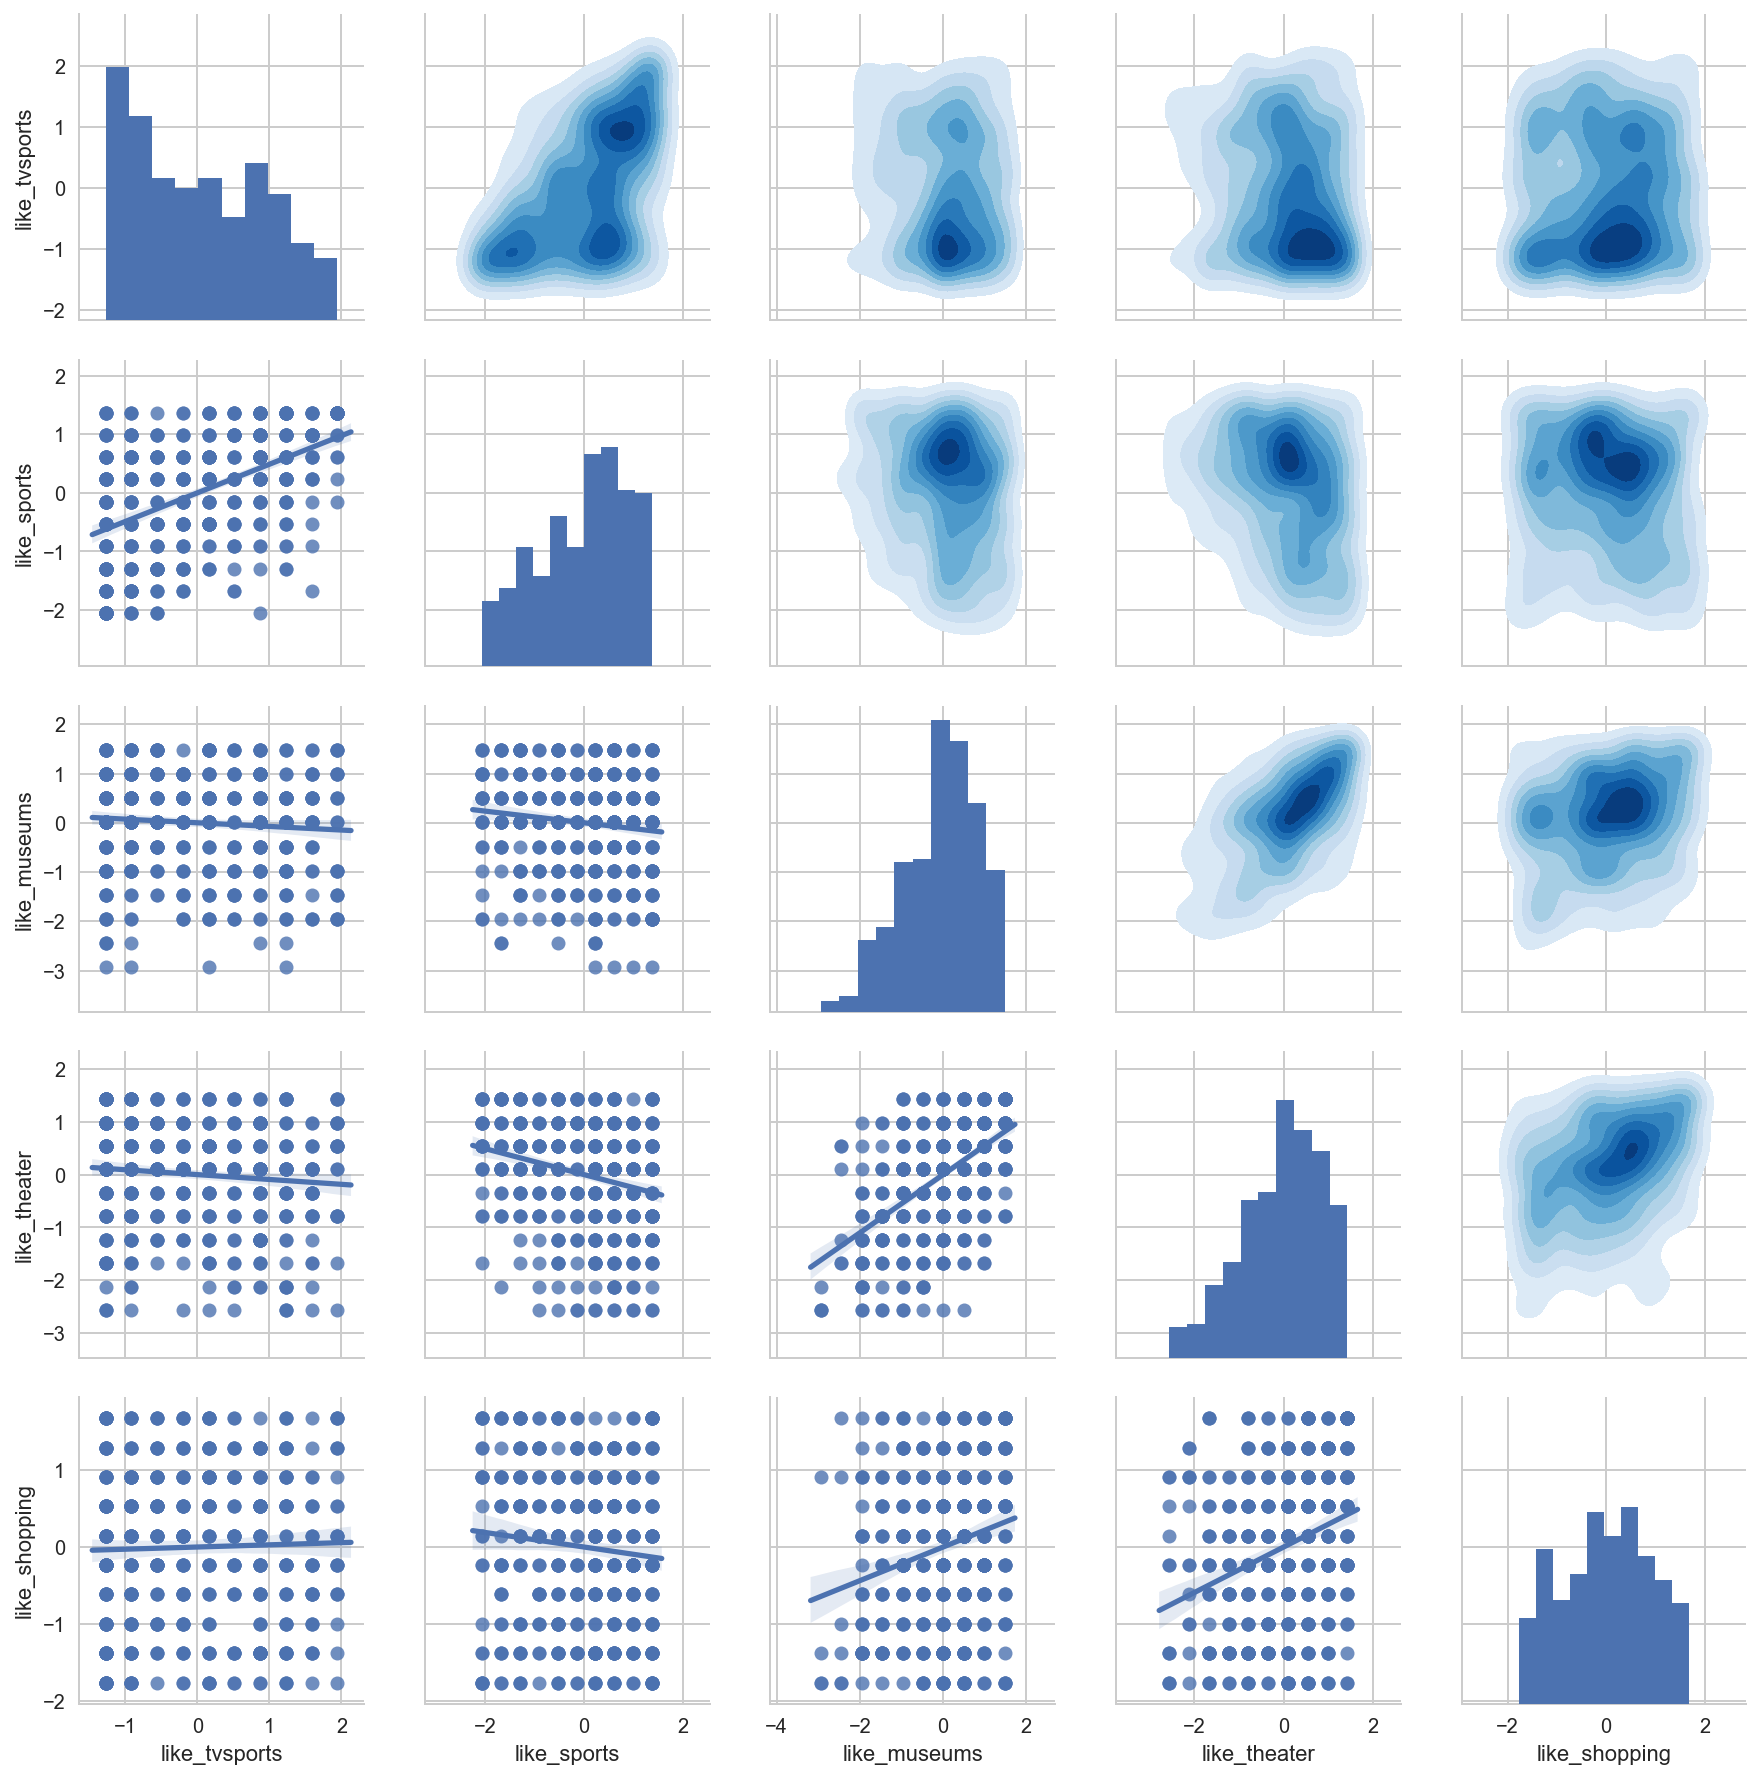

In [157]:
g = sns.PairGrid(sd_like_pcadf)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

#### 4.C. Visualize correlation using a heatmap

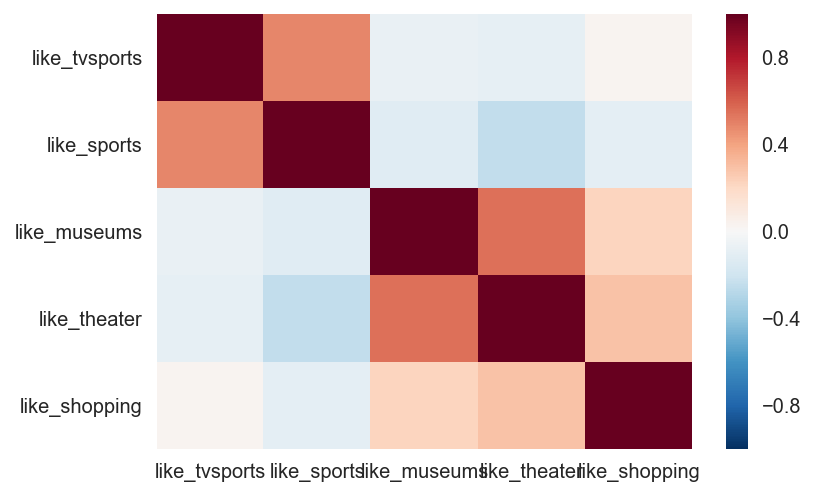

In [158]:
sns.heatmap(sd_like_pcadf.corr())

---

### 5. EXAMPLE: Fit PCA on the subjective ratings


In [145]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective_sd_df.values)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

---

#### 5.A. Look at principal component weighting vectors (eigenvectors)

The principal components, or eigenvectors, can be thought of as weightings on the original variables to transform them into the new feature space.

In [146]:
print(subjective_pca.explained_variance_)
print ('\n')
print(subjective_pca.components_)

[ 2.15642881  0.88760955  0.73684686  0.72096547  0.4981493 ]


[[-0.50189394 -0.31528977 -0.46707122 -0.48386412 -0.44318711]
 [ 0.21825979 -0.90905995 -0.09768977  0.27400972  0.20334221]
 [-0.40202351 -0.14438615  0.42289342 -0.48141404  0.63791176]
 [ 0.34811874 -0.21377638  0.64842003 -0.36104737 -0.53132783]
 [-0.64626278 -0.08749096  0.41594928  0.57330577 -0.27017855]]


---

#### 5.B. Look at the explained variance ratio

The principal components are ordered such that the first components have the largest variances. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [147]:
print (subjective_pca.explained_variance_ratio_)

[ 0.43128576  0.17752191  0.14736937  0.14419309  0.09962986]


---

#### 5.C. Transform the subjective data into principal component space

The transform function in the PCA will create you new component variable matrix.

In [148]:
subjective_pca.transform(subjective_sd_df.values)

array([[ 0.673942  ,  0.03439955, -0.10382612, -0.35798348,  0.57693667],
       [ 1.35044583,  2.02341707, -2.13879048,  1.07112465,  1.64483811],
       [-0.94967947, -0.27146457, -0.03924025,  0.28967741, -0.18508884],
       ..., 
       [ 1.27802939,  0.74844718, -0.36801805, -0.31785638, -0.5792599 ],
       [ 2.37402987, -0.92246551,  0.44869284,  1.6557433 , -1.43968236],
       [ 1.22960363,  0.72837603, -0.34611708,  0.16632973, -1.41541178]])

In [149]:
subjective_sd_df.head()

subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                  -0.786472             -0.202716                -0.354194   
1                  -0.066425             -2.329267                -0.354194   
2                   0.653622              0.506135                 0.564338   
3                  -0.066425             -0.202716                -1.272726   
4                  -0.786472             -3.746968                 1.482870   

   subjective_fun  subjective_ambition  
0        0.193323            -0.323589  
1        1.486916            -2.564932  
2        0.193323             0.236747  
3        0.840119             0.236747  
4       -1.100270             0.236747

This transformed our 5-dimensional data into vectors along its 5 principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for $0.431 + 0.178 + 0.147 = 75.6\%$ of the variance.

---

#### 5.D. PCA transformed features are not correlated

- Keep in mind that each column in the transformed data is no longer correlated!
- Compare this to the exploration above, where many columns were correlated.

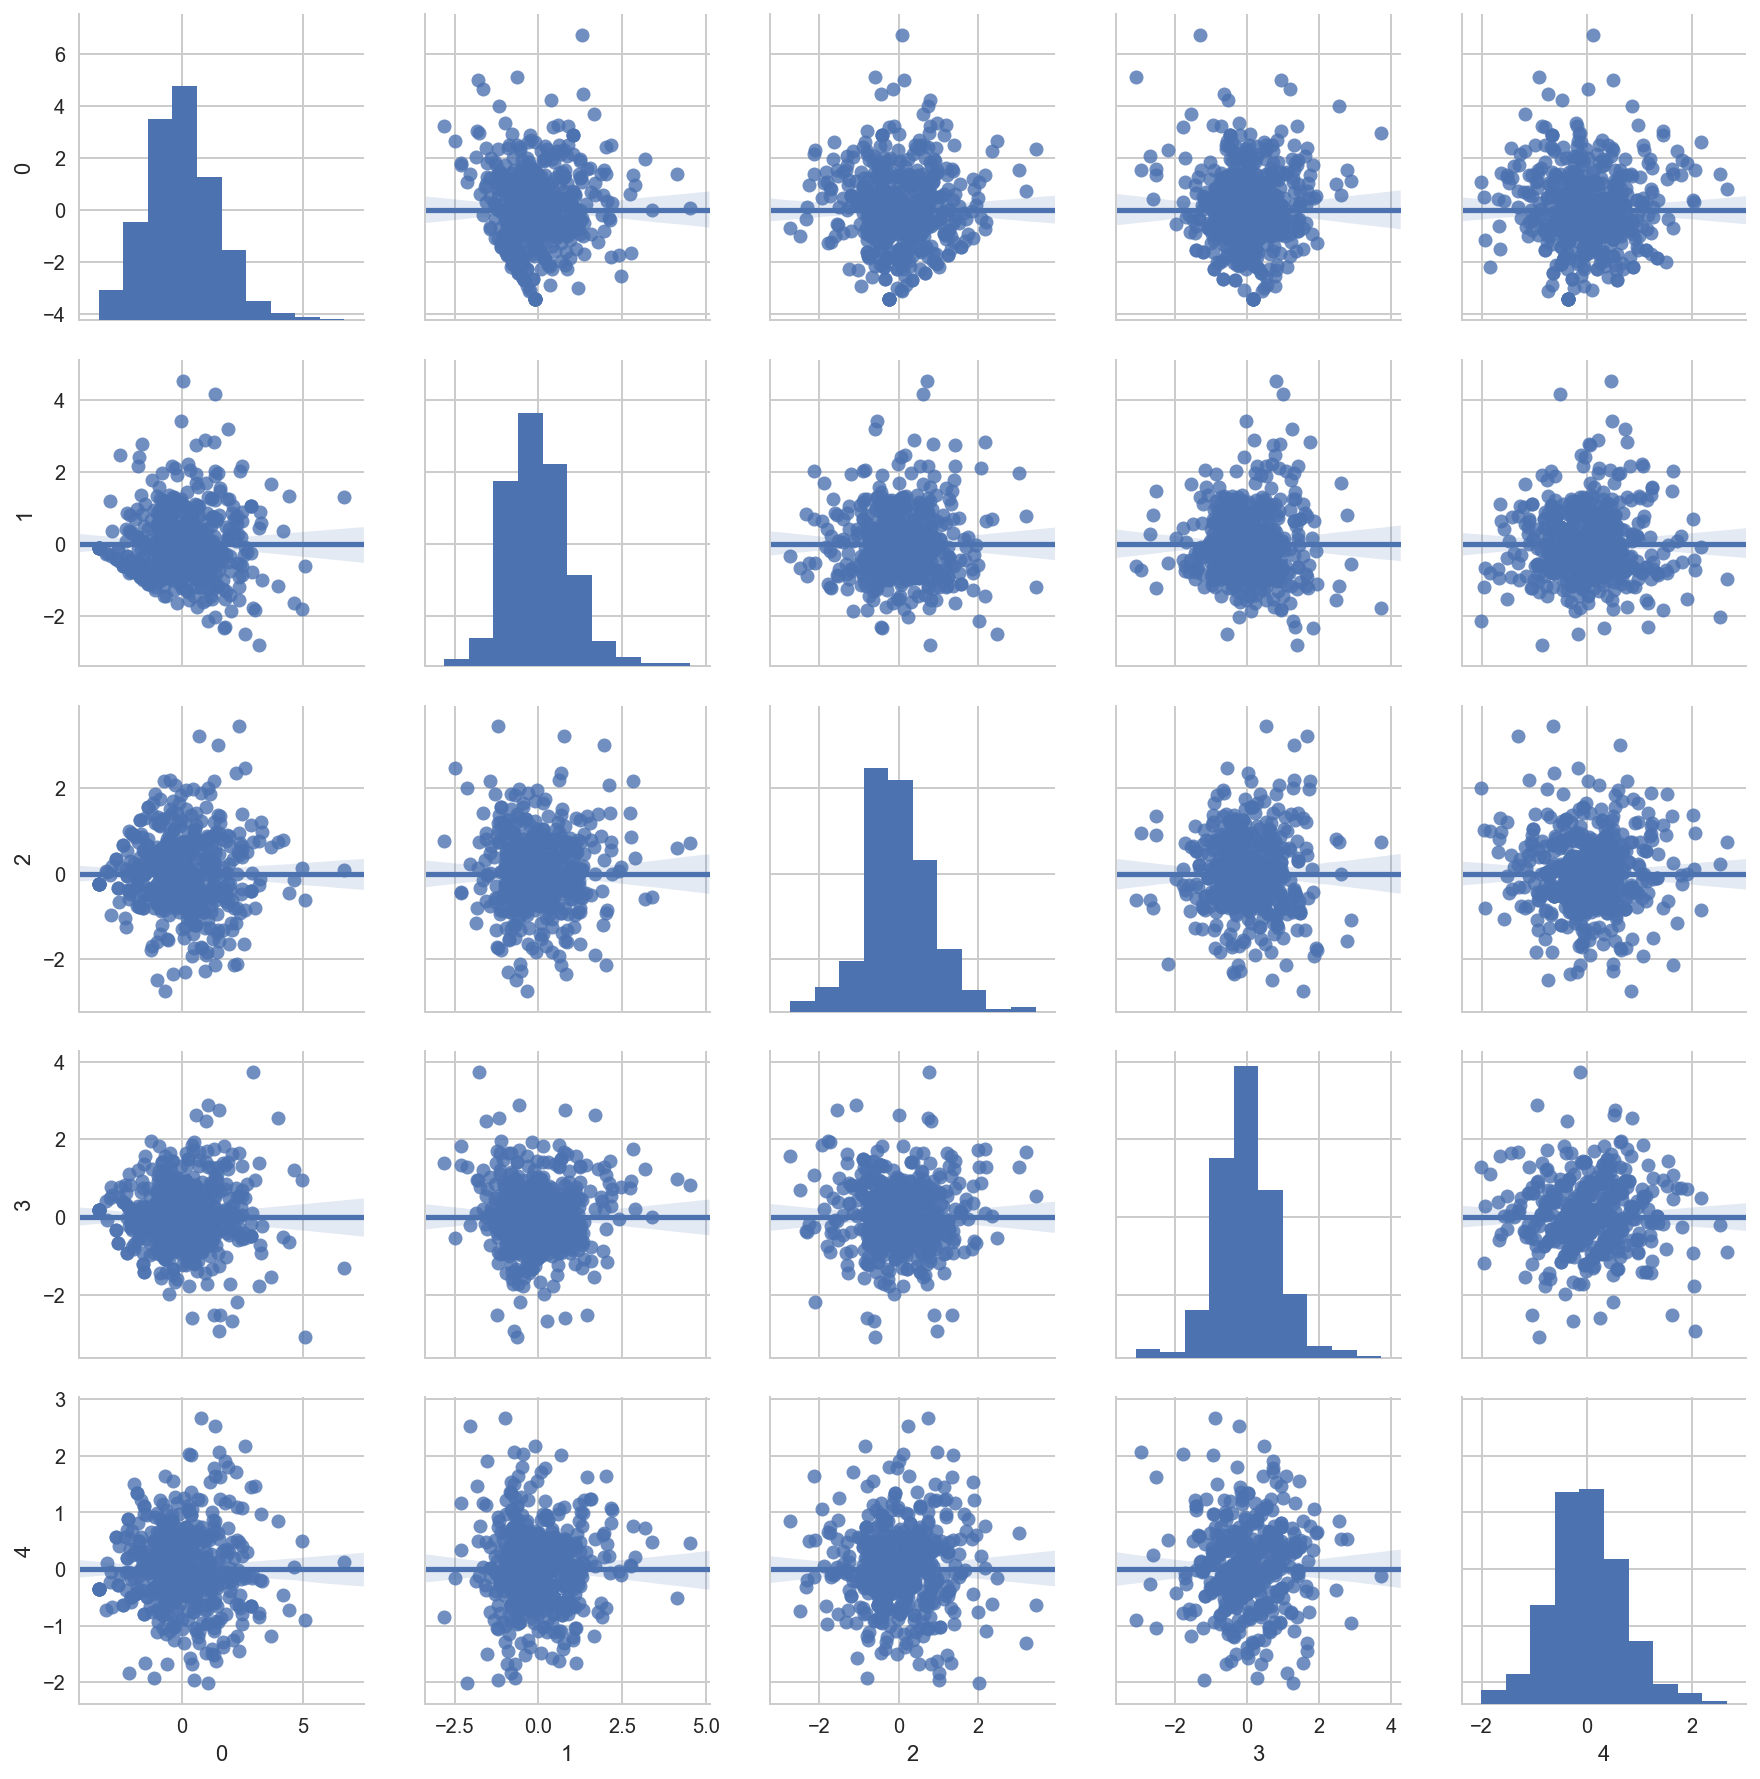

In [150]:
subjective_pca_transformed_df = subjective_pca.transform(subjective_sd_df.values)
sns.pairplot(pd.DataFrame(subjective_pca_transformed_df), kind='reg')

---

### 6.  OPTIONAL: How was the data transformed?

To demonstrate how the the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component PC1 manually.

#### 6.A. Pull out the eigenvector for PC1

#### 6.B. Create a dataframe showing the original values for the subjective variables for person 1

In [179]:
# A:

#### 6.C. Add the eigenvector for PC1: the weights to multiply each original variable by

Recall that each component is a linear combination of the original variables multiplied by a "weight" defined in the eigenvector of that component.

In [180]:
# A:

#### 6.D. Multiply the original variable values by the eigenvector values

These are the "pieces" of principal component 1 that will be added together to make the new value for that person.

In [181]:
# A:

#### 6.E. Sum the original values multiplied by the eigenvector weights to get person 1's value for PC1

In [182]:
# A:

---

### 7. Fit PCA on the preference data

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns
- Transform the original `sd_like` columns into the principal component space
- Verify these columns are uncorrelated

In [172]:
sd_like

like_tvsports  like_sports  like_museums  like_theater  like_shopping
0              2.0          9.0           1.0           1.0            8.0
1              2.0          3.0           8.0           9.0            3.0
2              8.0          3.0           5.0           7.0            8.0
3              1.0          1.0           6.0           9.0            1.0
4              4.0          7.0           6.0           6.0            8.0
5              8.0         10.0           8.0           5.0            1.0
6              3.0          5.0          10.0          10.0           10.0
7              2.0          2.0           9.0           9.0            8.0
8              3.0          4.0           6.0          10.0            8.0
9              9.0          9.0           6.0           6.0            7.0
10             7.0          8.0           7.0           4.0            5.0
11             7.0          9.0           7.0           4.0            5.0
12             8.0          7.0           5.0          10.0            8.0
13             6.0         10.0           3.0           3.0            6.0
14             7.0          9.0           4.0           9.0            2.0
15             2.0          7.0           7.0           7.0            6.0
16             2.0          8.0           7.0           7.0            2.0
17             5.0          5.0           4.0           3.0            2.0
18            10.0         10.0           5.0           1.0            7.0
19            10.0         10.0           9.0           8.0            5.0
20             8.0         10.0           5.0           4.0            5.0
21             2.0          1.0           8.0           8.0            8.0
22             2.0          2.0           7.0          10.0           10.0
23             1.0         10.0           6.0           6.0            6.0
24             4.0          7.0           6.0           7.0            8.0
25             4.0          9.0           7.0           9.0            5.0
26             6.0          7.0           7.0           5.0            7.0
28             9.0          8.0           7.0           5.0            9.0
29             6.0          5.0           4.0           7.0            6.0
30             3.0          3.0           7.0           8.0           10.0
..             ...          ...           ...           ...            ...
521            1.0          8.0           4.0           2.0            3.0
522            1.0          4.0           8.0           8.0            7.0
523            2.0          6.0           5.0           9.0            8.0
524            1.0          2.0          10.0          10.0            4.0
525            5.0          5.0           7.0           8.0            7.0
526            8.0          5.0           2.0           3.0            2.0
527            4.0          7.0           8.0           8.0            4.0
528           10.0          7.0           3.0           8.0            6.0
529           10.0         10.0          10.0          10.0            1.0
530            8.0          7.0           6.0           6.0            5.0
531            3.0          7.0           5.0           5.0            2.0
532            9.0          7.0           9.0           6.0            4.0
533            3.0          4.0           7.0           6.0            5.0
534            3.0          7.0           7.0           4.0            7.0
535            6.0          6.0           8.0          10.0           10.0
536            2.0          8.0           8.0           4.0            6.0
537            9.0          8.0           9.0           7.0            7.0
538            4.0          6.0           7.0           9.0            6.0
539           10.0         10.0           3.0           5.0            9.0
540            7.0          4.0           9.0           8.0            9.0
541            8.0          8.0           8.0           6.0            8.0
542            4.0          3.

#### 7.A. Find PCA eigenvalues and eigenvectors for the five `sd_like` columns

In [173]:
pca_like = PCA(n_components=5)
pca_like.fit_transform(sd_like)

array([[ 2.81350898,  3.85269742,  7.56237539, -2.705369  , -0.97147733],
       [-4.10082263,  2.09891484, -2.85392433,  1.09303732, -0.53665021],
       [-0.10560807, -1.92130802,  2.46239798,  4.7803506 , -0.66512906],
       ..., 
       [-2.00846233,  0.57140891,  0.44357423,  0.0175746 , -0.02808634],
       [-2.19618596,  1.52046869,  2.25868605, -2.13796109,  1.03166853],
       [-1.69831735, -1.24683055, -0.50821729, -3.58304442,  1.62341326]])

#### 7.B. Transform the original `sd_like` columns into the principal component space

In [174]:
pca_like.components_

array([[ 0.62736939,  0.62167038, -0.2330427 , -0.33685671, -0.22836866],
       [-0.44611128, -0.17137686, -0.36194075, -0.44630599, -0.66439789],
       [-0.11063564, -0.08530062, -0.50180641, -0.49012362,  0.69889393],
       [ 0.62338705, -0.74294543, -0.20709265,  0.01934922, -0.12711771],
       [ 0.08087475, -0.15783472,  0.72110537, -0.66838834,  0.04256242]])

In [177]:
# Converting to a dataframe 
ss_like_pca_df = pd.DataFrame(pca_like.fit_transform(sd_like), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
ss_like_pca_df

PC1       PC2       PC3       PC4       PC5
0    2.813509  3.852697  7.562375 -2.705369 -0.971477
1   -4.100823  2.098915 -2.853924  1.093037 -0.536650
2   -0.105608 -1.921308  2.462398  4.780351 -0.665129
3   -5.048710  4.940457 -2.966862  2.623962 -1.829191
4   -0.024590 -0.738005  2.552055 -0.911421 -0.230473
5    5.819251  1.336629 -3.552136 -0.190420  1.432184
6   -4.631635 -4.510923  0.263360 -1.054127  0.300314
7   -6.097379 -1.413638  0.224040  0.993302  0.555102
8   -3.864397 -1.562987  0.958098  0.771425 -2.511397
9    4.583966 -2.646917  1.129382  0.846741 -0.184331
10   3.604965  0.276149  0.516607  0.351357  1.784511
11   4.226636  0.104772  0.431306 -0.391589  1.626676
12   1.370503 -3.945733  0.650825  1.866617 -3.301633
13   5.261595  1.609178  3.652884 -1.076018 -0.785504
14   3.926586  0.952258 -2.610575  0.707788 -4.006269
15  -1.392491  0.674766  0.383609 -2.091703 -0.424631
16   0.142654  3.160981 -2.497268 -2.326178 -0.752715
17   2.206306  5.207824  0.892641  2.316701  0.473651
18   7.750332 -0.670935  3.885870  0.837529  2.359545
19   4.916902 -3.914044 -2.950009  0.398838  0.480123
20   5.941761  0.211166  1.238983 -0.096962  0.107506
21  -6.149150 -0.434015  1.301270  1.923990  0.660220
22  -6.424888 -2.464859  2.135317  1.172601 -1.470372
23   0.415050  1.414994  1.230272 -4.756183 -1.031726
24  -0.361447 -1.184311  2.061932 -0.892072 -0.898862
25   0.660244 -0.788424 -1.687405 -2.165004 -1.957890
26   1.562331 -0.881465  1.620207  0.236029  1.278208
27   3.609373 -3.719971  2.600788  1.109009  1.448122
28   0.572774  0.318897  1.617087  2.509014 -1.948778
29  -4.502134 -2.189735  2.919628  1.014344 -0.210556
..        ...       ...       ...       ...       ...
512  1.670328  6.260047  2.268299 -2.552151  0.387598
513 -4.683140  0.162364  0.457110 -0.801115  0.063278
514 -2.678527 -0.651383  1.890063 -1.150110 -2.960658
515 -6.381173  0.881818 -3.452831  0.690642  0.356695
516 -1.318949 -1.431518  0.431073  1.156580 -0.492163
517  4.554500  4.593372  1.564347  4.601047 -0.725936
518 -0.250914  0.303093 -2.227381 -0.778437 -0.295289
519  4.221778 -1.892667  1.015626  3.743113 -3.330442
520  4.923620 -2.511005 -7.227638  0.738915 -0.305798
521  3.169993 -0.529257  0.012831  1.963480 -0.034661
522  1.288152  4.502740 -0.538743 -0.584359 -0.619440
523  3.326603 -1.396792 -2.302118  2.092707  2.166967
524 -2.064907  1.853490  0.320105  0.868289  0.755574
525  0.017080  0.903175  2.442238 -1.653482  1.703972
526 -1.661771 -5.296752  0.849765  0.487274 -1.057107
527  0.006707  1.480367  1.266872 -3.099789  2.143805
528  2.926311 -4.007669 -0.780860  0.987758  1.468431
529 -1.433136 -0.938691 -0.732609 -0.063285 -1.441823
530  6.412254 -3.061073  4.326776  1.074876 -1.671094
531 -1.608703 -4.205040  0.689278  2.477879  1.354757
532  2.640472 -3.417709  1.020599  0.424996  1.377402
533 -3.537908 -2.189540  3.299116  1.618382  0.538708
534  3.199507  5.327333  0.296238 -3.475280  0.162958
535  3.487709 -0.964243  6.057289 -2.414968  0.024976
536  1.453571 -2.706985 -1.711589 -1.252440 -1.032472
537  6.636215  1.599445  1.543702  0.444341 -1.377268
538  0.317694 -2.610046  0.874065 -1.199374 -0.923105
539 -2.008462  0.571409  0.443574  0.017575 -0.028086
540 -2.196186  1.520469  2.258686 -2.137961  1.031669
541 -1.698317 -1.246831 -0.508217 -3.583044  1.623413

[542 rows x 5 columns]

#### 7.C. Verify these columns are uncorrelated

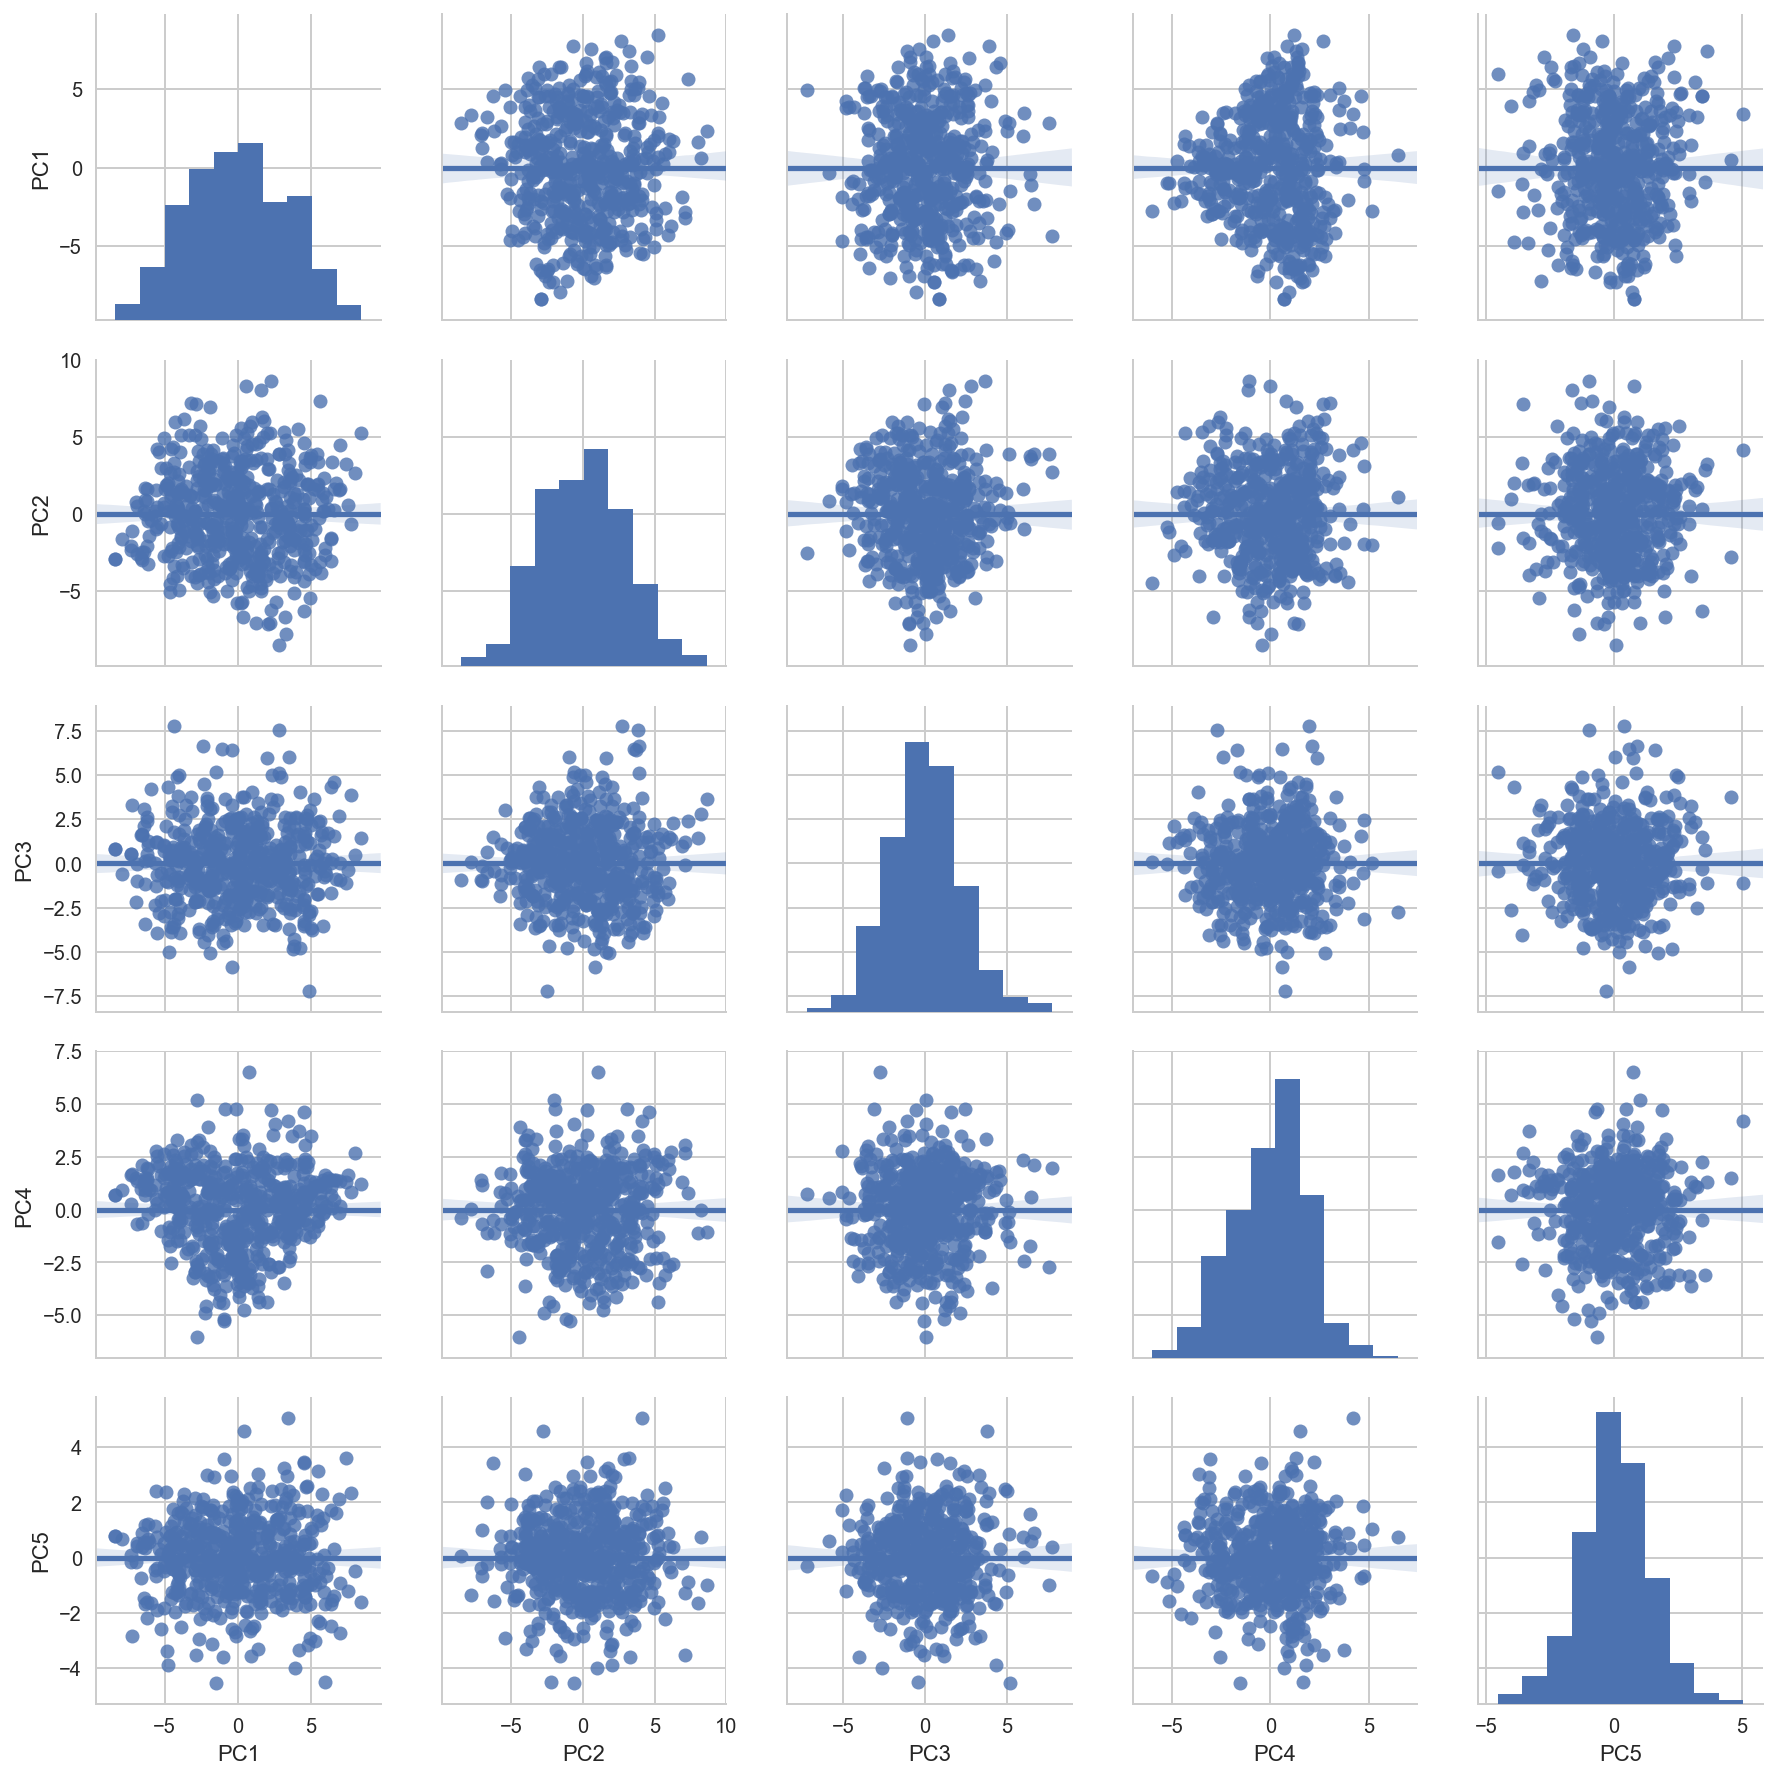

In [178]:
sns.pairplot(ss_like_pca_df, kind='reg')

---

### 8. Use PCA for dimensionality reduction

Using linear regression, let's predict whether a user likes reading!

**The key question: ** Can we get the same prediction accuracy using only the first three principal components as features, versus using all five original values as features?

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reading = sd['like_reading'].values

#### 8.A. Linear regression cross-validated on original variables (`sd_like.values`)

- What is the mean cross val score?
- Keep in mind that Linear Regression uses error for score -- so zero is the ideal score!

In [198]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score, cross_val_predict
linereg = LinearRegression()
scores = cross_val_score(linereg, sd_like.values, reading, cv=10)
print (scores)
print(np.mean(scores))

[ 0.0572145  -0.10260757  0.20705881 -0.02153198  0.05578277  0.03202637
  0.14161886  0.22415082  0.116138    0.16539735]
0.0875247930476


#### 8.B. Linear regression on first principal component

- What is the mean cross val score?

In [201]:
linereg = LinearRegression()
scores = cross_val_score(linereg, pca_like.fit_transform(sd_like)[:,0:1], reading, cv=10)
print (scores)
print(np.mean(scores))

[-0.09504639 -0.04177884  0.17470462 -0.04251398 -0.05084837  0.02109824
  0.04244269  0.08094066  0.00451662  0.05726086]
0.0150776125177


#### 8.C. Linear regression on first 3 principal components

- What is the mean cross val score?

In [202]:
linereg = LinearRegression()
scores = cross_val_score(linereg, pca_like.fit_transform(sd_like)[:,0:3], reading, cv=10)
print (scores)
print(np.mean(scores))

[-0.01309672 -0.098337    0.24861075 -0.05364416  0.06772413  0.06097709
  0.15897263  0.21525112  0.0558572   0.13356316]
0.0775878210552


---

**Check yourself**. The mean cross val score should be nearly the same for the first 3 principal components as it was on the 5-component original data!